<h1 align= center>Capstone Project</h1>
<h1 align= center>The Battle of Neighborhoods</h1>

### For this week, you will required to submit the following:

#### A description of the problem and a discussion of the background. (15 marks)
#### A description of the data and how it will be used to solve the problem. (15 marks)

In [8]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
# uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering librbary

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [97]:
import urllib,json
import matplotlib.pyplot as plt

In [99]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup as BS

In [200]:
from pandas.core.frame import DataFrame

# Introduction
we are going to discuss if someone wants to rent a house in Manhattan. 
Which neighborhood he will choose depending on average rent cost and venues convenient. 

First, we are going to collect the Borough data from WIKI. 

# 1. Download and Explore Dataset

In [27]:
url = "https://cocl.us/new_york_dataset"
response = urllib.request.urlopen(url)
newyork_data = json.loads(response.read())
#json_url = urlopen('https://cocl.us/new_york_dataset')
#data = json.loads(json_url.read())
print(newyork_data)

{'type': 'FeatureCollection', 'totalFeatures': 306, 'features': [{'type': 'Feature', 'id': 'nyu_2451_34572.1', 'geometry': {'type': 'Point', 'coordinates': [-73.84720052054902, 40.89470517661]}, 'geometry_name': 'geom', 'properties': {'name': 'Wakefield', 'stacked': 1, 'annoline1': 'Wakefield', 'annoline2': None, 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.84720052054902, 40.89470517661, -73.84720052054902, 40.89470517661]}}, {'type': 'Feature', 'id': 'nyu_2451_34572.2', 'geometry': {'type': 'Point', 'coordinates': [-73.82993910812398, 40.87429419303012]}, 'geometry_name': 'geom', 'properties': {'name': 'Co-op City', 'stacked': 2, 'annoline1': 'Co-op', 'annoline2': 'City', 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.82993910812398, 40.87429419303012, -73.82993910812398, 40.87429419303012]}}, {'type': 'Feature', 'id': 'nyu_2451_34572.3', 'geometry': {'type': 'Point', 'coordinates': [-73.82780644716412, 40.887555677350775]}, 'geometry_n

### Load and Explore the data

In [28]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [29]:
neighborhoods_data = data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

### Transform the data into a pandas dataframe

In [30]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']

neighborhoods = pd.DataFrame(columns=column_names)

In [31]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [32]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [33]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [34]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]

    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [35]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [36]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

The owner want to open his restaraunt in the center of city. So he choose to check the data of Manhattan. 

In [37]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [38]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [39]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [40]:
CLIENT_ID = 'YOQERRXT4Q1C1XLUNFXLUQ3ZUOJOIDIMAE3HD2QFJ541KXGT' # your Foursquare ID
CLIENT_SECRET = '2P0UAY5YNEMYXXCMXK2IVH2C2SBJBXQEMH5VKNWKZKHL3ZOY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YOQERRXT4Q1C1XLUNFXLUQ3ZUOJOIDIMAE3HD2QFJ541KXGT
CLIENT_SECRET:2P0UAY5YNEMYXXCMXK2IVH2C2SBJBXQEMH5VKNWKZKHL3ZOY


In [41]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [42]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


## Get the average rent cost of Manhattan
The data is craped from "Manhattan, NY Rental Market Trends" (https://www.rentcafe.com/average-rent-market-trends/us/ny/manhattan/)

In [115]:
source = requests.get("https://www.rentcafe.com/average-rent-market-trends/us/ny/manhattan/").text
soup = BS(source)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="always" name="referrer"/>
<meta content="width=device-width" name="viewport"/>
<meta content="The average apartment rent in Manhattan is $4,210. Browse detailed statistics &amp; rent trends, compare apartment sizes and rent prices by neighborhood." name="description"/>
<title>Average Rent in Manhattan &amp; Rent Prices by Neighborhood - RENTCafé</title>
<script>
                    (function() { 
                        if(window.BOOMR && window.BOOMR.version) return;
                        var dom,doc,where,iframe = document.createElement('iframe'),win = window;
                        function boomerangSaveLoadTime(e) { win.BOOMR_onload=(e && e.timeStamp) || new Date().getTime(); }
                        if (win.addEventListener) { 
                            win.addEventListener(

In [141]:
labels = []
prices = []
tabel = soup.find('div',class_ = 'table-neighborhood')
print(tabel)

<div class="table-neighborhood" style="display:block;">
<div class="scroll-pane">
<table class="market-trends market-trends-nhood" id="MarketTrendsAverageRentTable">
<tbody>
<tr>
<th>Neighborhood</th>
<th>Average Rent</th>
</tr>
<tr class="current-row">
<th>Marble Hill</th>
<td>$1,708</td>
</tr>
<tr class="current-row">
<th>Washington Heights</th>
<td>$2,190</td>
</tr>
<tr class="current-row">
<th>Inwood</th>
<td>$2,375</td>
</tr>
<tr class="current-row">
<th>Randalls and Wards Islands</th>
<td>$2,408</td>
</tr>
<tr class="current-row">
<th>Harlem</th>
<td>$2,763</td>
</tr>
<tr class="current-row">
<th>East Harlem</th>
<td>$3,003</td>
</tr>
<tr class="current-row">
<th>Roosevelt Island</th>
<td>$3,426</td>
</tr>
<tr class="current-row">
<th>Stuyvesant Town</th>
<td>$3,628</td>
</tr>
<tr class="current-row">
<th>Liberty Island</th>
<td>$3,725</td>
</tr>
<tr class="current-row">
<th>Governors Island</th>
<td>$3,725</td>
</tr>
<tr class="current-row">
<th>Ellis Island</th>
<td>$3,725</td>

In [151]:
prices = []
trs = tabel.find_all('tr')
trs

[<tr>
 <th>Neighborhood</th>
 <th>Average Rent</th>
 </tr>,
 <tr class="current-row">
 <th>Marble Hill</th>
 <td>$1,708</td>
 </tr>,
 <tr class="current-row">
 <th>Washington Heights</th>
 <td>$2,190</td>
 </tr>,
 <tr class="current-row">
 <th>Inwood</th>
 <td>$2,375</td>
 </tr>,
 <tr class="current-row">
 <th>Randalls and Wards Islands</th>
 <td>$2,408</td>
 </tr>,
 <tr class="current-row">
 <th>Harlem</th>
 <td>$2,763</td>
 </tr>,
 <tr class="current-row">
 <th>East Harlem</th>
 <td>$3,003</td>
 </tr>,
 <tr class="current-row">
 <th>Roosevelt Island</th>
 <td>$3,426</td>
 </tr>,
 <tr class="current-row">
 <th>Stuyvesant Town</th>
 <td>$3,628</td>
 </tr>,
 <tr class="current-row">
 <th>Liberty Island</th>
 <td>$3,725</td>
 </tr>,
 <tr class="current-row">
 <th>Governors Island</th>
 <td>$3,725</td>
 </tr>,
 <tr class="current-row">
 <th>Ellis Island</th>
 <td>$3,725</td>
 </tr>,
 <tr class="current-row">
 <th>Tudor City</th>
 <td>$3,881</td>
 </tr>,
 <tr class="current-row">
 <th>Cent

In [197]:
prices = []
for tr in trs:
    if tr.find('td') != None:
        string = (tr.find('td').get_text().replace('$',''))
        price = string.replace(',','')
        prices.append(float(price))
len(prices)

51

In [198]:
neighborhoods = []
for th in trs:
    neighborhoods.append(th.find('th').get_text())
neighborhoods.remove(neighborhoods[0])
len(neighborhoods)

51

In [201]:
averageprice = {
    'Neighborhood': neighborhoods,
    'price':prices
}
averageprice = DataFrame(averageprice)
averageprice

,Neighborhood,price
0,Marble Hill,1708.0
1,Washington Heights,2190.0
2,Inwood,2375.0
3,Randalls and Wards Islands,2408.0
4,Harlem,2763.0
5,East Harlem,3003.0
6,Roosevelt Island,3426.0
7,Stuyvesant Town,3628.0
8,Liberty Island,3725.0
9,Governors Island,3725.0


In [208]:
count,bin_edges = np.histogram(averageprice['price'])
print(count)
print(bin_edges)

[ 1  3  1  1  2  5 24  6  3  5]
[1708.  2101.3 2494.6 2887.9 3281.2 3674.5 4067.8 4461.1 4854.4 5247.7
 5641. ]


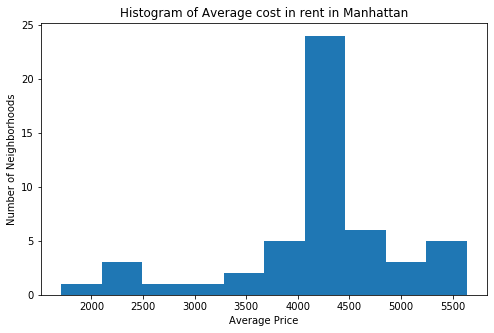

In [210]:
averageprice['price'].plot(kind = 'hist',figsize = (8,5))
plt.title('Histogram of Average cost in rent in Manhattan') # add a title to the histogram
plt.ylabel('Number of Neighborhoods') # add y-label
plt.xlabel('Average Price') # add x-label

plt.show()

###### let's get the top 100 venues that are in Marble Hill within a radius of 1000 meters.

In [43]:
LIMIT = 100

radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=YOQERRXT4Q1C1XLUNFXLUQ3ZUOJOIDIMAE3HD2QFJ541KXGT&client_secret=2P0UAY5YNEMYXXCMXK2IVH2C2SBJBXQEMH5VKNWKZKHL3ZOY&v=20180605&ll=40.87655077879964,-73.91065965862981&radius=1000&limit=100'

In [44]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e7407fcb1cac0001bb76b24'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 82,
  'suggestedBounds': {'ne': {'lat': 40.88555078779965,
    'lng': -73.89877901972629},
   'sw': {'lat': 40.86755076979963, 'lng': -73.92254029753333}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4baf59e8f964a520a6f93be3',
       'name': 'Bikram Yoga',
       'location': {'address': '5500 Broadway',
        'crossStreet': '230th Street',
        'lat': 40.876843690797934,
        'lng': -73.9062038

In [45]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [47]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Bikram Yoga,Yoga Studio,40.876844,-73.906204
1,Arturo's,Pizza Place,40.874412,-73.910271
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Sam's Pizza,Pizza Place,40.879435,-73.905859
4,Starbucks,Coffee Shop,40.877531,-73.905582


In [48]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

82 venues were returned by Foursquare.


## Explore Neighborhoods in Manhattan

In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [51]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3325, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [52]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,94,94,94,94,94,94
Carnegie Hill,100,100,100,100,100,100
Central Harlem,43,43,43,43,43,43
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,45,45,45,45,45,45
East Village,100,100,100,100,100,100


In [53]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 339 uniques categories.


# Analyze Each Neighborhood

In [54]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Loo

In [55]:
manhattan_onehot.shape

(3325, 340)

In [56]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Loo

In [57]:
manhattan_grouped.shape

(40, 340)

#### Get the top most common venues

In [58]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
            venue  freq
0            Park  0.07
1     Coffee Shop  0.06
2           Hotel  0.05
3   Memorial Site  0.03
4  Clothing Store  0.03


----Carnegie Hill----
         venue  freq
0  Pizza Place  0.06
1  Coffee Shop  0.06
2         Café  0.05
3  Yoga Studio  0.03
4    Bookstore  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1   Chinese Restaurant  0.07
2   Seafood Restaurant  0.05
3  American Restaurant  0.05
4       Cosmetics Shop  0.05


----Chelsea----
                 venue  freq
0          Coffee Shop  0.06
1   Italian Restaurant  0.05
2               Bakery  0.05
3  American Restaurant  0.03
4            Wine Shop  0.03


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1           Cocktail Bar  0.05
2    American Restaurant  0.04
3  Vietnamese Restaurant  0.04
4                    Spa  0.03


----Civic Center----
                  venue  freq
0           Coffee Shop  0.06


In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Shopping Mall,Gym,Clothing Store,Women's Store,Wine Shop,Pizza Place
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Yoga Studio,Gym,Bakery,French Restaurant,Bookstore,Grocery Store,Gym / Fitness Center
2,Central Harlem,African Restaurant,Chinese Restaurant,Cosmetics Shop,Bar,American Restaurant,French Restaurant,Seafood Restaurant,Gym,Dessert Shop,Beer Bar
3,Chelsea,Coffee Shop,Bakery,Italian Restaurant,Wine Shop,American Restaurant,Theater,Hotel,Ice Cream Shop,Breakfast Spot,Seafood Restaurant
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Optical Shop,Spa,Hotpot Restaurant,Dumpling Restaurant


### Cluster Neighborhoods

In [61]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 0, 1, 1, 1, 1, 3, 0, 0])

In [62]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Sandwich Place,Gym,American Restaurant,Coffee Shop,Yoga Studio,Deli / Bodega,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Optical Shop,Spa,Hotpot Restaurant,Dumpling Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Grocery Store,Chinese Restaurant,Mobile Phone Shop,Spanish Restaurant,Clothing Store,Park,Deli / Bodega,Supplement Shop
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Café,Pizza Place,Lounge,Restaurant,Deli / Bodega,Frozen Yogurt Shop,Chinese Restaurant,Park,Bakery
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Pizza Place,Deli / Bodega,Coffee Shop,Mexican Restaurant,Café,Yoga Studio,School,Bakery,Caribbean Restaurant,Chinese Restaurant


In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters 

#### Cluster 1

In [64]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Harlem,African Restaurant,Chinese Restaurant,Cosmetics Shop,Bar,American Restaurant,French Restaurant,Seafood Restaurant,Gym,Dessert Shop,Beer Bar
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Sushi Restaurant,Diner,Wine Shop,Japanese Restaurant
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Cocktail Bar,Burger Joint,Gym,Café,Gym / Fitness Center,Thai Restaurant
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Café,Coffee Shop,Mediterranean Restaurant,Bakery,Indian Restaurant,Yoga Studio,Dessert Shop
13,Lincoln Square,Plaza,Theater,Italian Restaurant,Café,Performing Arts Venue,Concert Hall,French Restaurant,Gym / Fitness Center,American Restaurant,Indie Movie Theater
18,Greenwich Village,Italian Restaurant,Clothing Store,Café,Sushi Restaurant,French Restaurant,Indian Restaurant,Dessert Shop,Caribbean Restaurant,Boutique,Seafood Restaurant
19,East Village,Bar,Ice Cream Shop,Wine Bar,Pizza Place,Mexican Restaurant,Cocktail Bar,Chinese Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
25,Manhattan Valley,Bar,Coffee Shop,Pizza Place,Indian Restaurant,Yoga Studio,Mexican Restaurant,Playground,Thai Restaurant,Furniture / Home Store,Malay Restaurant
27,Gramercy,Bar,Italian Restaurant,Mexican Restaurant,Pizza Place,American Restaurant,Bagel Shop,Thrift / Vintage Store,Cocktail Bar,Coffee Shop,Diner
29,Financial District,Coffee Shop,American Restaurant,Bar,Gym,Pizza Place,Italian Restaurant,Wine Shop,Hotel,Gym / Fitness Center,Cocktail Bar


#### Cluster 2

In [65]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Optical Shop,Spa,Hotpot Restaurant,Dumpling Restaurant
8,Upper East Side,Italian Restaurant,Art Gallery,Coffee Shop,Bakery,Exhibit,Juice Bar,Gym / Fitness Center,French Restaurant,Hotel,Pizza Place
14,Clinton,Theater,Italian Restaurant,Gym / Fitness Center,American Restaurant,Coffee Shop,Sandwich Place,Spa,Hotel,Wine Shop,Cocktail Bar
15,Midtown,Hotel,Coffee Shop,Clothing Store,Theater,Bakery,French Restaurant,Steakhouse,Bookstore,Sporting Goods Shop,Cocktail Bar
16,Murray Hill,Sandwich Place,Coffee Shop,Japanese Restaurant,American Restaurant,Mediterranean Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Hotel,Pub
17,Chelsea,Coffee Shop,Bakery,Italian Restaurant,Wine Shop,American Restaurant,Theater,Hotel,Ice Cream Shop,Breakfast Spot,Seafood Restaurant
20,Lower East Side,Chinese Restaurant,Art Gallery,Coffee Shop,Café,Pizza Place,Cocktail Bar,Sandwich Place,Ramen Restaurant,Bakery,Japanese Restaurant
21,Tribeca,American Restaurant,Park,Italian Restaurant,Spa,Café,Coffee Shop,Wine Shop,Wine Bar,Greek Restaurant,Steakhouse
22,Little Italy,Café,Bakery,Bubble Tea Shop,Salon / Barbershop,Sandwich Place,Italian Restaurant,Cocktail Bar,Mediterranean Restaurant,Hotel,Clothing Store
23,Soho,Clothing Store,Boutique,Shoe Store,Women's Store,Art Gallery,Mediterranean Restaurant,Hotel,Furniture / Home Store,Bakery,Sporting Goods Shop


#### Cluster 3

In [66]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Park,Bar,Farmers Market,Gym / Fitness Center,Cocktail Bar,Fountain,Harbor / Marina,Coffee Shop,Heliport,German Restaurant


#### Cluster 4

In [67]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Grocery Store,Chinese Restaurant,Mobile Phone Shop,Spanish Restaurant,Clothing Store,Park,Deli / Bodega,Supplement Shop
3,Inwood,Mexican Restaurant,Café,Pizza Place,Lounge,Restaurant,Deli / Bodega,Frozen Yogurt Shop,Chinese Restaurant,Park,Bakery
4,Hamilton Heights,Pizza Place,Deli / Bodega,Coffee Shop,Mexican Restaurant,Café,Yoga Studio,School,Bakery,Caribbean Restaurant,Chinese Restaurant
5,Manhattanville,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Park,Italian Restaurant,Chinese Restaurant,Café,Climbing Gym,Check Cashing Service,Japanese Curry Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Pizza Place,Latin American Restaurant,Spa,French Restaurant,Steakhouse,Street Art
11,Roosevelt Island,Park,Coffee Shop,Sandwich Place,Dog Run,Kosher Restaurant,Gym,Baseball Field,Dry Cleaner,Liquor Store,Playground
26,Morningside Heights,Bookstore,American Restaurant,Park,Coffee Shop,Deli / Bodega,Burger Joint,Sandwich Place,Ice Cream Shop,Farmers Market,Supermarket
36,Tudor City,Park,Café,Mexican Restaurant,Deli / Bodega,Diner,Pizza Place,Coffee Shop,Spanish Restaurant,Asian Restaurant,Dog Run


#### Cluster 5

In [68]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Gym,American Restaurant,Coffee Shop,Yoga Studio,Deli / Bodega,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place


## Plot the count of Venues in Manhatton

In [73]:
M_venues = manhattan_venues.groupby('Venue Category').count().sort_values(by = 'Venue', ascending=False)
M_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Coffee Shop,136,136,136,136,136,136
Italian Restaurant,126,126,126,126,126,126
American Restaurant,85,85,85,85,85,85
Café,81,81,81,81,81,81
Pizza Place,74,74,74,74,74,74
Bakery,73,73,73,73,73,73
Hotel,67,67,67,67,67,67
Park,63,63,63,63,63,63
Cocktail Bar,63,63,63,63,63,63


In [87]:
M_venues = manhattan_venues.groupby('Neighborhood').count()
M_venues

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,94,94,94,94,94,94
Carnegie Hill,100,100,100,100,100,100
Central Harlem,43,43,43,43,43,43
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,45,45,45,45,45,45
East Village,100,100,100,100,100,100


In [94]:
manhattan_venues['Neighborhood'].unique()

array(['Marble Hill', 'Chinatown', 'Washington Heights', 'Inwood',
       'Hamilton Heights', 'Manhattanville', 'Central Harlem',
       'East Harlem', 'Upper East Side', 'Yorkville', 'Lenox Hill',
       'Roosevelt Island', 'Upper West Side', 'Lincoln Square', 'Clinton',
       'Midtown', 'Murray Hill', 'Chelsea', 'Greenwich Village',
       'East Village', 'Lower East Side', 'Tribeca', 'Little Italy',
       'Soho', 'West Village', 'Manhattan Valley', 'Morningside Heights',
       'Gramercy', 'Battery Park City', 'Financial District',
       'Carnegie Hill', 'Noho', 'Civic Center', 'Midtown South',
       'Sutton Place', 'Turtle Bay', 'Tudor City', 'Stuyvesant Town',
       'Flatiron', 'Hudson Yards'], dtype=object)